In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


from datetime import datetime, timedelta

import yfinance as yf

from scipy.stats import uniform, binom, norm, iqr

from sklearn.neighbors import KernelDensity
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score

from matplotlib.colors import ListedColormap

In [200]:
pd.options.display.max_rows = 800

In [201]:
# Training Simple Machine Learning Algorithms for Classification
df = pd.read_csv(
 'https://archive.ics.uci.edu/ml/'
 'machine-learning-databases/iris/iris.data',
 header=None, encoding='utf-8')

In [202]:
#df = pd.read_csv("iris.data.csv")

In [203]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        for _ in range(self.n_iter):
                errors = 0
                for xi, target in zip(X, y):
                    update = self.eta * (target - self.predict(xi))
                    self.w_ += update * xi
                    self.b_ += update
                    errors += int(update != 0.0)
                self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
      

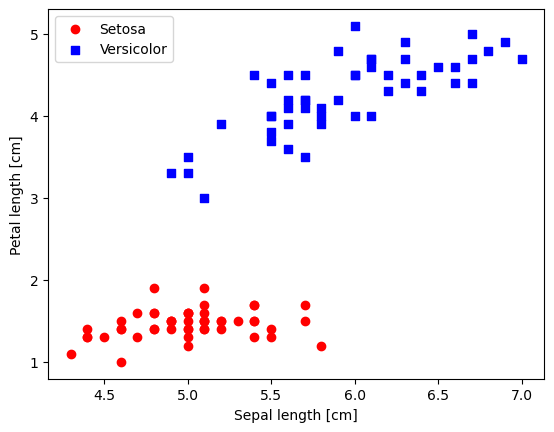

In [204]:
y = df.iloc[0:100,4].values
y = np.where(y=="Iris-setosa", 0, 1)
x = df.iloc[0:100, [0,2]].values
plt.scatter(x[:50,0], x[:50,1], color="red", marker="o", label="Setosa")
plt.scatter(x[50:,0], x[50:,1],  color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


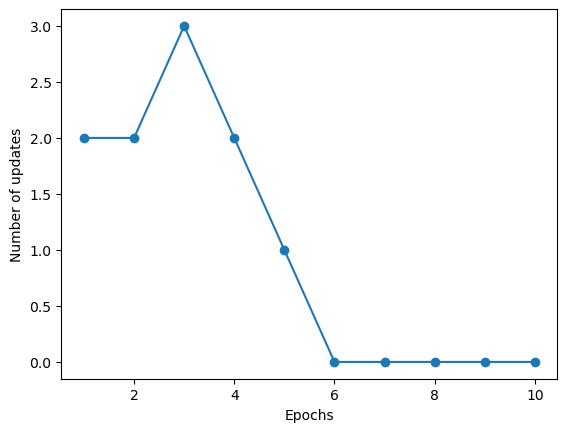

In [205]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(x,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker="o")
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [206]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
        # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
     # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')


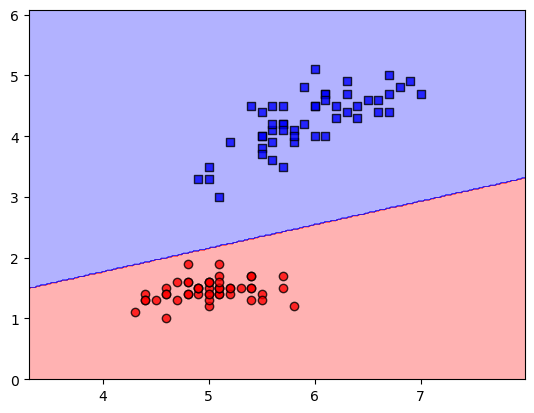

In [207]:
plot_decision_regions(x, y, classifier=ppn)

# AdalineGD

In [208]:
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activiation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors ** 2).mean()
            self.losses_.append(loss)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activiation(self, x):
        return x
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.5, 1, 0)
      

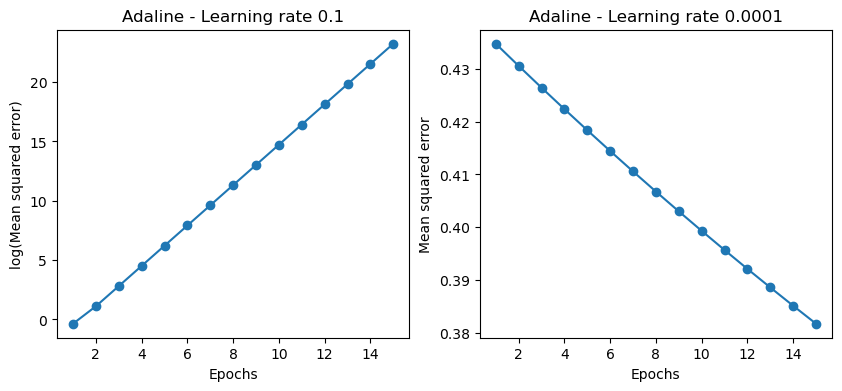

In [209]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdlineGD(n_iter=15, eta=0.1).fit(x,y)
ax[0].plot(range(1, len(ada1.losses_)+1), np.log10(ada1.losses_), marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Mean squared error)")
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(x,y)
ax[1].plot(range(1, len(ada2.losses_)+1), ada2.losses_, marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Mean squared error")
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

# Standarization

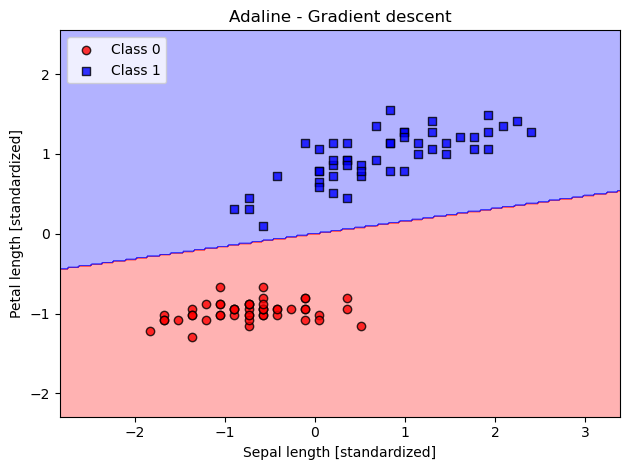

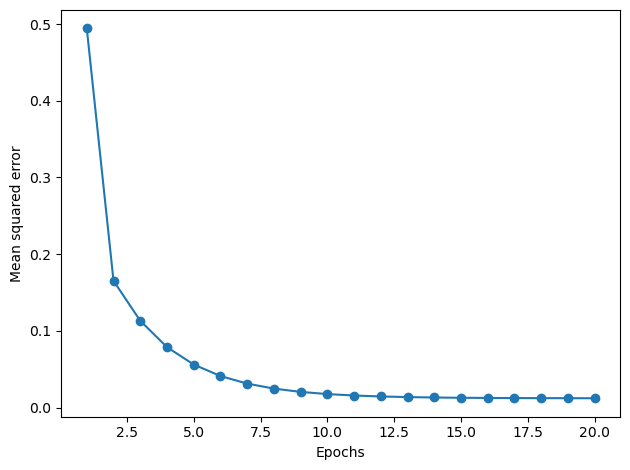

In [210]:
X_std = np.copy(x)
X_std[:,0] = (x[:,0] - x[:,0].mean()) / (x[:,0].std())
X_std[:,1] = (x[:,1] - x[:,1].mean()) / (x[:,1].std())
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

In [215]:
class AdalineSGD:
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.W_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, x, y):
        self._initialize_weights(x.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                x, y = self._shuffle(x, y)
            losses = []
            for xi, target in zip(x, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self
    
    def partial_fit(self, x, y):
        if not self.w_initialized:
            self._initialized_weights(x.shape[1])
        if y.ravel().shape[0] >1 :
            for xi, target in zip(x, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(x, y)
        return self
    
    def _shuffle(self, x, y):
        r = self.rgen.permutation(len(y))
        return x[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        output = self.activiation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activiation(self, x):
        return x
    
    def predict(self, X):
        return np.where(self.activiation(self.net_input(X) >= 0.5), 1, 0)

            
    

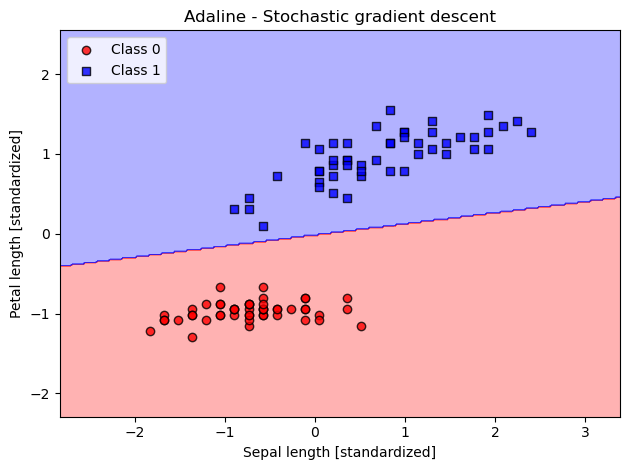

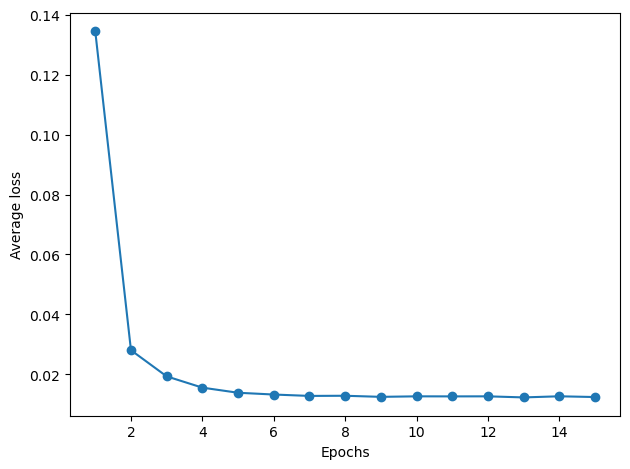

In [216]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()


In [217]:
iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

ppn = Perceptron(eta=0.1, random_state=1)
ppn.fit(x_train_std, y_train)
y_pred = ppn.predict(x_test_std)
Misclassified_examples = (y_test != y_pred).sum()
Misclassified_examples_prc = (Misclassified_examples/len(y_test))
Accuracy = "Accuracy: %.3f" % accuracy_score(y_test, y_pred)
Accuracy

'Accuracy: 0.667'

In [218]:
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
     # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
     # highlight test examples
    if test_idx:
     # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

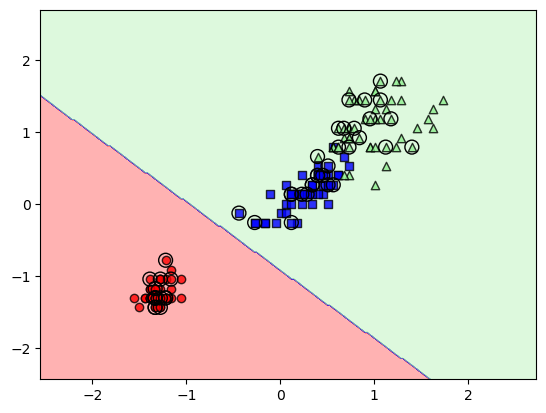

In [219]:
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=x_combined_std,
                         y = y_combined, 
                     classifier = ppn,
                     test_idx = range(105, 150))

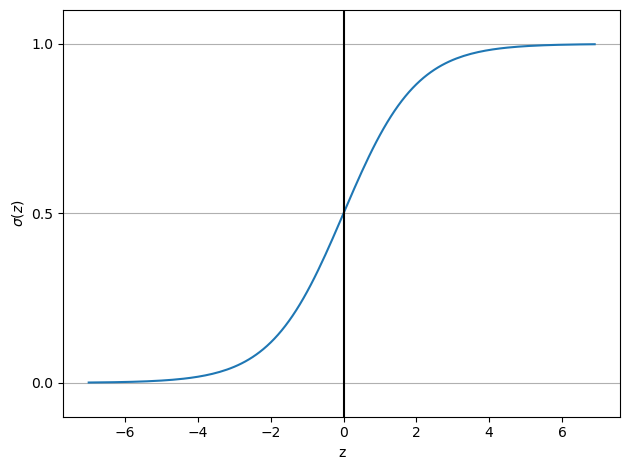

In [220]:
def sigmoid(z):
    return 1.0 / (1.0+np.exp(-z))
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color="k")
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("$\sigma (z)$")

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

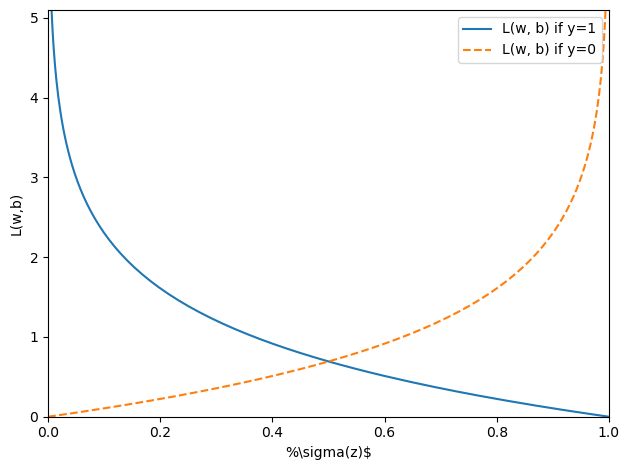

In [221]:
def loss_1(z):
    return -np.log(sigmoid(z))
def loss_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label = "L(w, b) if y=1")
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle="--", label = "L(w, b) if y=0")
plt.ylim([0.0, 5.1])
plt.xlim([0,1])
plt.xlabel("%\sigma(z)$")
plt.ylabel("L(w,b)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [222]:
class LogisticRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state=random_state
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = x.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(x)
            output = self.activiation(net_input)
            errors = (y-output)
            self.w_ += self.eta * 2.0 * x.T.dot(errors) / x.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))/ x.shape[0])
            self.losses_.append(loss)
        return self
    def net_input(self, x):
        return np.dot(x, self.w_) + self.b_
    
    def activiation(self, z):
        return 1./(1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, x):
        return np.where(self.activiation(self.net_input(x))>0.5, 1, 0)

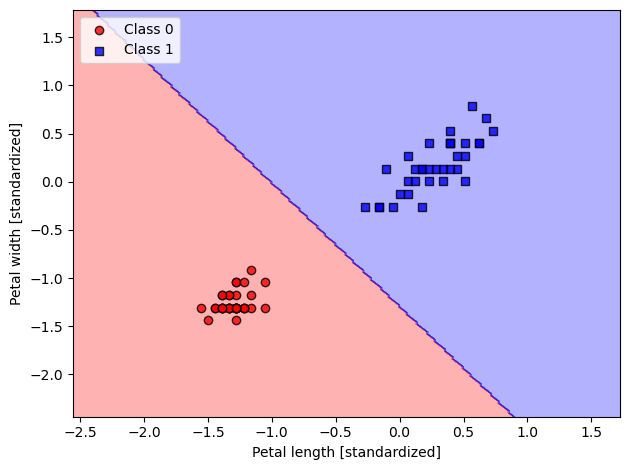

In [223]:
x_train_01_subset = x_train_std[(y_train == 0) | (y_train==1)]
y_train_01_subset = y_train[(y_train ==0) | y_train ==1]
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(x_train_01_subset , y_train_01_subset)
plot_decision_regions(X=x_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

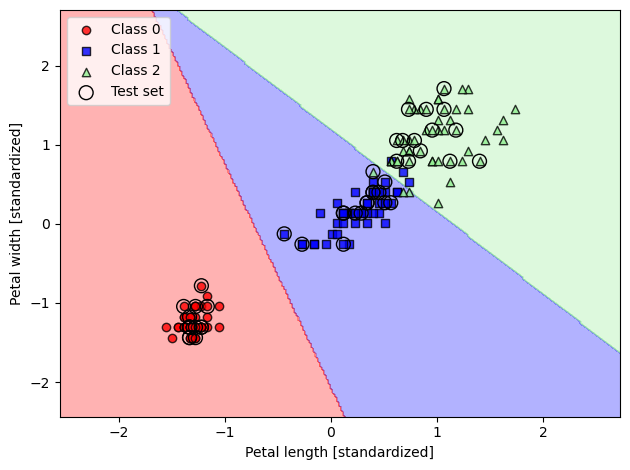

In [224]:
lr = LogisticRegression(C=100.0, solver="lbfgs", multi_class="ovr")
lr.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std, y_combined, classifier=lr, test_idx = range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [123]:
train = pd.read_csv("laptop prices.csv")
train = train.sort_values("brand")
train = train[train["brand"].isin(["HP",  "Dell" ])]


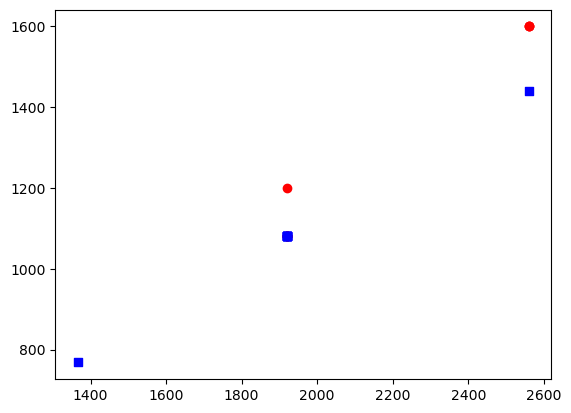

In [127]:
y = train.iloc[:, 2].values
y = np.where(y=="HP", 0, 1)
x = train.iloc[:,[14,15]].values
plt.scatter(x[:10, 0], x[:10, 1], color="red", marker="o", label="HP")
plt.scatter(x[187:197, 0], x[187:197, 1], color="blue", marker="s", label="Dell")


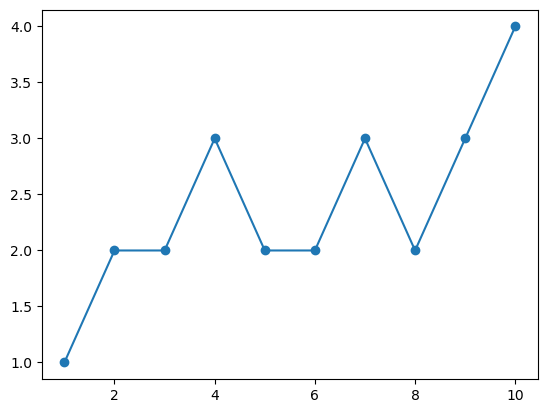

In [128]:
ppn= Perceptron(eta=0.1, n_iter=10)
ppn.fit(x,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker="o")

In [ ]:
def class_labels(y):
    res = "Class Labels:", np.unique(y)
    return res
def bincount(y):
    res = "Labels count in " , np.bincount(y)
    return res

In [ ]:
# Numpay 
x = [5,7,2,4]
A1 = np.dot(x,2)
A2 = np.linalg.norm(x)
A3 = np.arccos(x/A2) # Trigonmetric inverse cosine
A1